In [1]:
from joblib import Memory
from sklearn import svm
import sklearn.datasets as sd
import scipy.sparse as sparse

In [2]:
import matplotlib.pyplot as plt
import h5py
import numpy as np

In [3]:
#import dask
#import dask.array as da
#dask.config.set(scheduler='threads')

In [4]:
from sklearn.model_selection import GridSearchCV
from dask_ml.wrappers import Incremental
from sklearn.linear_model import SGDClassifier

In [5]:
filelist = ["./url_svmlight/Day%s.svm" % i for i in range(0,121)]

## Import file using sklearn datasets

In [6]:
mem = Memory("./cache")

In [7]:
@mem.cache
def get_data():
    data = sd.load_svmlight_files(filelist)
    return data

In [8]:
data = get_data()

In [28]:
days = np.array([(data[i], data[i+1]) for i in range(0, len(data)) if i%2==0])

In [29]:
days

array([[<16000x3231961 sparse matrix of type '<class 'numpy.float64'>'
	with 1847536 stored elements in Compressed Sparse Row format>,
        array([-1., -1., -1., ..., -1., -1.,  1.])],
       [<20000x3231961 sparse matrix of type '<class 'numpy.float64'>'
	with 2304202 stored elements in Compressed Sparse Row format>,
        array([-1., -1., -1., ..., -1., -1., -1.])],
       [<20000x3231961 sparse matrix of type '<class 'numpy.float64'>'
	with 2300129 stored elements in Compressed Sparse Row format>,
        array([-1., -1.,  1., ...,  1.,  1.,  1.])],
       [<20000x3231961 sparse matrix of type '<class 'numpy.float64'>'
	with 2302278 stored elements in Compressed Sparse Row format>,
        array([ 1.,  1.,  1., ...,  1., -1., -1.])],
       [<20000x3231961 sparse matrix of type '<class 'numpy.float64'>'
	with 2298268 stored elements in Compressed Sparse Row format>,
        array([-1.,  1.,  1., ..., -1.,  1.,  1.])],
       [<20000x3231961 sparse matrix of type '<class 'numpy.

In [10]:
len(days)

121

In [ ]:
#da_days = da.from_array(days, chunks=(7000, 7000))

# Testing all days

In [12]:
totalurls = np.empty(0)

for day in days:
    totalurls =np.append(totalurls, day[1])

In [15]:
totalurls

array([-1., -1., -1., ...,  1., -1., -1.])

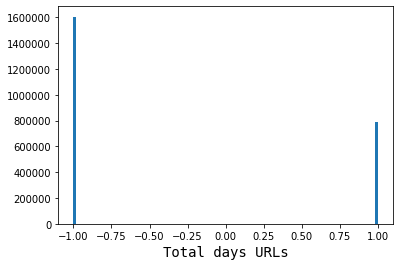

In [16]:
plt.hist(totalurls, 100)
plt.xlabel("Total days URLs", fontdict={'fontsize': 14, 'family': 'monospace'})
plt.show()

<h6> Merge all the attributes into a single numpy matrix so that we can do all the analysis on it </h6>

In [37]:
#totalattr = [da.from_array(day[0], chunks=5000) for day in days]

In [38]:
#totalattr

[dask.array<array, shape=(16000, 3231961), dtype=float64, chunksize=(5000, 5000)>,
 dask.array<array, shape=(20000, 3231961), dtype=float64, chunksize=(5000, 5000)>,
 dask.array<array, shape=(20000, 3231961), dtype=float64, chunksize=(5000, 5000)>,
 dask.array<array, shape=(20000, 3231961), dtype=float64, chunksize=(5000, 5000)>,
 dask.array<array, shape=(20000, 3231961), dtype=float64, chunksize=(5000, 5000)>,
 dask.array<array, shape=(20000, 3231961), dtype=float64, chunksize=(5000, 5000)>,
 dask.array<array, shape=(20000, 3231961), dtype=float64, chunksize=(5000, 5000)>,
 dask.array<array, shape=(20000, 3231961), dtype=float64, chunksize=(5000, 5000)>,
 dask.array<array, shape=(20000, 3231961), dtype=float64, chunksize=(5000, 5000)>,
 dask.array<array, shape=(20000, 3231961), dtype=float64, chunksize=(5000, 5000)>,
 dask.array<array, shape=(20000, 3231961), dtype=float64, chunksize=(5000, 5000)>,
 dask.array<array, shape=(20000, 3231961), dtype=float64, chunksize=(5000, 5000)>,
 das

<h6>We remove the only to elements with a different shape, since they will complicate our analysis </h6>

In [39]:
#for i in range(0, len(totalattr)):
#    if totalattr[i].shape != (20000, 3231961):
#        print(i)

0
45


In [40]:
#totalattr.pop(0)

dask.array<array, shape=(16000, 3231961), dtype=float64, chunksize=(5000, 5000)>

In [41]:
#totalattr.pop(44)

dask.array<array, shape=(130, 3231961), dtype=float64, chunksize=(130, 5000)>

In [42]:
#len(totalattr)

119

In [43]:
#for i in range(0, len(totalattr)):
#    if totalattr[i].shape != (20000, 3231961):
#        print(i)

## SVM

In [11]:
from dask_ml.model_selection import GridSearchCV

In [34]:
estimator = svm.SVC(gamma='auto', random_state=0, probability=True)

param_grid = {
    'C': [0.1, 1.0, 20.0, 100.0],
    'kernel': ['rbf', 'poly', 'linear'],
}

grid_search = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=2)

In [33]:
trainingset = days[:60]

In [30]:
trainingset

array([[<16000x3231961 sparse matrix of type '<class 'numpy.float64'>'
	with 1847536 stored elements in Compressed Sparse Row format>,
        array([-1., -1., -1., ..., -1., -1.,  1.])],
       [<20000x3231961 sparse matrix of type '<class 'numpy.float64'>'
	with 2304202 stored elements in Compressed Sparse Row format>,
        array([-1., -1., -1., ..., -1., -1., -1.])],
       [<20000x3231961 sparse matrix of type '<class 'numpy.float64'>'
	with 2300129 stored elements in Compressed Sparse Row format>,
        array([-1., -1.,  1., ...,  1.,  1.,  1.])],
       [<20000x3231961 sparse matrix of type '<class 'numpy.float64'>'
	with 2302278 stored elements in Compressed Sparse Row format>,
        array([ 1.,  1.,  1., ...,  1., -1., -1.])],
       [<20000x3231961 sparse matrix of type '<class 'numpy.float64'>'
	with 2298268 stored elements in Compressed Sparse Row format>,
        array([-1.,  1.,  1., ..., -1.,  1.,  1.])],
       [<20000x3231961 sparse matrix of type '<class 'numpy.

In [15]:
#trainingvalues = [da.from_array(day[0], chunks=5000) for day in trainingset]
trainingvalues = np.array([day[0] for day in trainingset])

In [16]:
#targetvalues = [da.from_array(day[1], chunks=5000) for day in trainingset]
targetvalues = np.array([day[1] for day in trainingset])

In [17]:
for i in range(0, len(trainingvalues)):
    if trainingvalues[i].shape != (20000, 3231961):
        print(i)

0
45


In [18]:
trainingvalues = np.delete(trainingvalues, 0)
trainingvalues = np.delete(trainingvalues, 44)
#trainingvalues.pop(44)
targetvalues = np.delete(targetvalues, 0)
targetvalues = np.delete(targetvalues, 44)
#targetvalues.pop(44)

In [19]:
for i in range(0, len(trainingvalues)):
    if trainingvalues[i].shape != (20000, 3231961):
        print(i)

In [20]:
for i in range(0, len(targetvalues)):
    if targetvalues[i].shape != (20000,):
        print(i)

## Grid search fit

In [35]:
%time grid_search.fit(trainingvalues[0], targetvalues[0])

CPU times: user 1h 49min 35s, sys: 23.7 s, total: 1h 49min 58s
Wall time: 31min 7s


GridSearchCV(cache_cv=True, cv=2, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False),
       iid=True, n_jobs=-1,
       param_grid={'C': [0.1, 1.0, 20.0, 100.0], 'kernel': ['rbf', 'poly', 'linear']},
       refit=True, return_train_score='warn', scheduler=None, scoring=None)

In [47]:
result = grid_search.predict(days[80][0])

In [48]:
print(result)

[-1. -1. -1. ...  1.  1. -1.]


In [49]:
print(days[80][1])

[-1. -1.  1. ...  1.  1. -1.]


In [51]:
grid_search.score(days[80][0], days[80][1])

0.962

In [39]:
import pandas as pd

In [40]:
dataframe = pd.DataFrame(grid_search.cv_results_)

/home/giordano/anaconda3/envs/da2019/lib/python3.6/site-packages/dask_ml/model_selection/utils.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in sklearn 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/giordano/anaconda3/envs/da2019/lib/python3.6/site-packages/dask_ml/model_selection/utils.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in sklearn 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/giordano/anaconda3/envs/da2019/lib/python3.6/site-packages/dask_ml/model_selection/utils.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in sklearn 0.21. If you need training scores, please set return_train_score=Tru

In [41]:
dataframe

,params,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score,param_C,param_kernel
0,"{'C': 0.1, 'kernel': 'rbf'}",283.394730,0.512425,55.476513,0.801296,0.6596,0.6596,0.65960,0.00000,6,0.6596,0.6596,0.6596,0.0000,0.1,rbf
1,"{'C': 0.1, 'kernel': 'poly'}",264.614666,2.212999,49.284485,0.636770,0.6596,0.6596,0.65960,0.00000,6,0.6596,0.6596,0.6596,0.0000,0.1,poly
2,"{'C': 0.1, 'kernel': 'linear'}",56.675708,1.335779,8.591501,0.156480,0.9725,0.9712,0.97185,0.00065,1,0.9971,0.9955,0.9963,0.0008,0.1,linear
3,"{'C': 1.0, 'kernel': 'rbf'}",304.632739,1.721996,53.224661,0.144333,0.6596,0.6596,0.65960,0.00000,6,0.6596,0.6596,0.6596,0.0000,1,rbf
4,"{'C': 1.0, 'kernel': 'poly'}",269.526054,0.465220,43.615194,0.666295,0.6596,0.6596,0.65960,0.00000,6,0.6596,0.6596,0.6596,0.0000,1,poly
5,"{'C': 1.0, 'kernel': 'linear'}",63.028136,2.584315,10.501170,0.220283,0.9711,0.9691,0.97010,0.00100,4,1.0000,1.0000,1.0000,0.0000,1,linear
6,"{'C': 20.0, 'kernel': 'rbf'}",329.679870,1.449176,53.777318,0.312472,0.6596,0.6596,0.65960,0.00000,6,0.6596,0.6596,0.6596,0.0000,20,rbf
7,"{'C': 20.0, 'kernel': 'poly'}",277.102170,0.443885,46.716522,0.318531,0.6596,0.6596,0.65960,0.00000,6,0.6596,0.6596,0.6596,0.0000,20,poly
8,"{'C': 20.0, 'kernel': 'linear'}",57.399282,1.093091,8.617285,0.130812,0.9713,0.9690,0.97015,0.00115,2,1.0000,1.0000,1.0000,0.0000,20,linear
9,"{'C': 100.0, 'kernel': 'rbf'}",323.836632,0.909477,52.142910,0.276029,0.7571,0.7605,0.75880,0.00170,5,0.7543,0.7701,0.7622,0.0079,100,rbf


In [104]:
testset = days[61:]

In [107]:
x_test = np.array([day[0] for day in testset])

In [108]:
y_test = np.array([day[1] for day in testset])

In [109]:
grid_search.score(x_test[0], y_test[0])

0.96565

# Train test split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x = np.array([day[0] for day in days])

In [55]:
y = np.array([day[1] for day in days])

In [57]:
x = np.delete(x, 0)
x = np.delete(x, 44)
#trainingvalues.pop(44)
y = np.delete(y, 0)
y = np.delete(y, 44)

In [74]:
len(x)

119

In [75]:
len(y)

119

In [58]:
for i in range(0, len(x)):
    if x[i].shape != (20000, 3231961):
        print(i)

In [60]:
for i in range(0, len(y)):
    if y[i].shape != (20000,):
        print(i)

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3) 

In [70]:
grid_search2 = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=2)

In [83]:
%time grid_search2.fit(x_train[0], y_train[0])

CPU times: user 1h 52min 45s, sys: 18.5 s, total: 1h 53min 4s
Wall time: 30min 56s


GridSearchCV(cache_cv=True, cv=2, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False),
       iid=True, n_jobs=-1,
       param_grid={'C': [0.1, 1.0, 20.0, 100.0], 'kernel': ['rbf', 'poly', 'linear']},
       refit=True, return_train_score='warn', scheduler=None, scoring=None)

In [85]:
pd.DataFrame(grid_search2.cv_results_)

/home/giordano/anaconda3/envs/da2019/lib/python3.6/site-packages/dask_ml/model_selection/utils.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in sklearn 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/giordano/anaconda3/envs/da2019/lib/python3.6/site-packages/dask_ml/model_selection/utils.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in sklearn 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/giordano/anaconda3/envs/da2019/lib/python3.6/site-packages/dask_ml/model_selection/utils.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in sklearn 0.21. If you need training scores, please set return_train_score=Tru

,params,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score,param_C,param_kernel
0,"{'C': 0.1, 'kernel': 'rbf'}",284.699363,8.713298,52.376557,2.863893,0.6436,0.6436,0.64360,0.00000,7,0.6436,0.6436,0.64360,0.00000,0.1,rbf
1,"{'C': 0.1, 'kernel': 'poly'}",266.704987,8.067899,43.515272,0.270062,0.6436,0.6436,0.64360,0.00000,7,0.6436,0.6436,0.64360,0.00000,0.1,poly
2,"{'C': 0.1, 'kernel': 'linear'}",46.096524,2.008375,6.688051,0.114210,0.9789,0.9845,0.98170,0.00280,1,0.9974,0.9978,0.99760,0.00020,0.1,linear
3,"{'C': 1.0, 'kernel': 'rbf'}",333.701370,3.699107,51.453655,1.268454,0.6436,0.6436,0.64360,0.00000,7,0.6436,0.6436,0.64360,0.00000,1,rbf
4,"{'C': 1.0, 'kernel': 'poly'}",293.805456,3.376055,43.336835,0.414181,0.6436,0.6436,0.64360,0.00000,7,0.6436,0.6436,0.64360,0.00000,1,poly
5,"{'C': 1.0, 'kernel': 'linear'}",43.212669,3.250559,6.704145,0.232342,0.9781,0.9838,0.98095,0.00285,2,1.0000,1.0000,1.00000,0.00000,1,linear
6,"{'C': 20.0, 'kernel': 'rbf'}",305.818440,10.699971,51.876172,1.311737,0.6945,0.6436,0.66905,0.02545,6,0.7777,0.6436,0.71065,0.06705,20,rbf
7,"{'C': 20.0, 'kernel': 'poly'}",271.954021,9.534899,43.547504,0.155623,0.6436,0.6436,0.64360,0.00000,7,0.6436,0.6436,0.64360,0.00000,20,poly
8,"{'C': 20.0, 'kernel': 'linear'}",43.704260,2.909007,6.884579,0.156031,0.9781,0.9837,0.98090,0.00280,3,1.0000,1.0000,1.00000,0.00000,20,linear
9,"{'C': 100.0, 'kernel': 'rbf'}",378.745062,37.512411,43.033727,6.403294,0.7455,0.8719,0.80870,0.06320,5,0.8281,0.8397,0.83390,0.00580,100,rbf


In [80]:
len(x_train)

35

In [81]:
len(y_train)

35

In [86]:
grid_search2.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [87]:
grid_search2.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False)

In [89]:
grid_search2.score(x_test[0], y_test[0])

0.96605

In [100]:
%time result = grid_search2.predict(x[25])

CPU times: user 12.6 s, sys: 4.1 ms, total: 12.6 s
Wall time: 12.6 s


In [101]:
np.array_equal(result, y[25])

False

In [102]:
np.sum(result == y[25])

19540

In [103]:
np.sum(result != y[25])

460